# <center> Майнор "Интеллектуальный анализ данных" </center>

# <center> Курс "Введение в программирование" </center>

# <center> Первичный анализ данных. Pandas. </center>

## Credits
[Открытый курс ODS по машинному обучению](https://github.com/Yorko/mlcourse_open) 

## Часть 1.   
  
1. Установите Anaconda (или Miniconda) и запустите Jupyter Notebook
2. Воспроизведите вычисления с семинара (файл `Explore_analysis.Pandas.ipynb`) <br>
   **Note:** Возможно, придется самостоятельно установить библиотеку seaborn. Для этого в Anaconda Prompt выполните `conda install seaborn`
3. Разберите тьюториалы [10 minutes to pandas](https://pandas.pydata.org/docs/user_guide/10min.html#min) и [Essential basic functionality](https://pandas.pydata.org/docs/user_guide/basics.html#basics).

## Часть 2. Анализ данных по доходу населения UCI Adult

**В задании предлагается с помощью Pandas ответить на несколько вопросов по данным репозитория UCI [Adult](https://archive.ics.uci.edu/ml/datasets/Adult).**

В качестве наблюдений в этом наборе данных представлены физические лица, они характеризуются различными признаками. Целевая переменная **salary** - доход человека > 50K или <= 50K.

In [ ]:
!pip install seaborn

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import scipy
from sklearn.neighbors import KNeighborsClassifier

# чтоб картинки рисовались в тетрадке
%matplotlib inline 

In [5]:
data = pd.read_csv('adult.data.csv')
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


**Определите размерность данных: сколько наблюдений и сколько признаков**

In [ ]:
data.shape

(32561, 15)

**Список признаков**  
**На источнике описание признаков скудное, но названия почти у всех признаков говорящие**

In [ ]:
print('\n'.join(data.columns.values.tolist()))

age
workclass
fnlwgt
education
education-num
marital-status
occupation
relationship
race
sex
capital-gain
capital-loss
hours-per-week
native-country
salary


**Проверьте, присутствуют ли в данных [пропущенные значения](http://pandas.pydata.org/pandas-docs/stable/missing_data.html). Сколько? В каких признаках?**  
**Удалите наблюдения с пропущенными значениями**

In [28]:
data.replace(to_replace='?',value=np.nan).isna().sum()
#data.head(10).replace(39,np.nan)

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
salary               0
dtype: int64

In [33]:
data=data.replace(to_replace='?',value=np.nan)
data=data.dropna()
data.shape

(30162, 15)

**Для каждого признака определите, к какому типу он относится. При необходимости, приведите признак к определенному вами типу.**

In [34]:
data.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
salary            object
dtype: object

**Для категориальных признаков выведите список категорий**

In [35]:
for column in data.columns:
  if data[column].dtype=='object':
    print(column,data[column].unique(),'', sep='\n')

workclass
['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov'
 'Self-emp-inc' 'Without-pay']

education
['Bachelors' 'HS-grad' '11th' 'Masters' '9th' 'Some-college' 'Assoc-acdm'
 '7th-8th' 'Doctorate' 'Assoc-voc' 'Prof-school' '5th-6th' '10th'
 'Preschool' '12th' '1st-4th']

marital-status
['Never-married' 'Married-civ-spouse' 'Divorced' 'Married-spouse-absent'
 'Separated' 'Married-AF-spouse' 'Widowed']

occupation
['Adm-clerical' 'Exec-managerial' 'Handlers-cleaners' 'Prof-specialty'
 'Other-service' 'Sales' 'Transport-moving' 'Farming-fishing'
 'Machine-op-inspct' 'Tech-support' 'Craft-repair' 'Protective-serv'
 'Armed-Forces' 'Priv-house-serv']

relationship
['Not-in-family' 'Husband' 'Wife' 'Own-child' 'Unmarried' 'Other-relative']

race
['White' 'Black' 'Asian-Pac-Islander' 'Amer-Indian-Eskimo' 'Other']

sex
['Male' 'Female']

native-country
['United-States' 'Cuba' 'Jamaica' 'India' 'Mexico' 'Puerto-Rico'
 'Honduras' 'England' 'Canada' 'Germany' 'Iran' 'Philippine

### Используя функции и методы Pandas, ответьте на вопросы:

**1. Сколько мужчин и женщин (признак *sex*) представлено в этом наборе данных?**

In [37]:
man_count=data[data['sex']=='Male'].shape[0]
woman_count=data[data['sex']=='Female'].shape[0]
print("M",man_count, "W", woman_count)

M 20380 W 9782


**2. Каков средний возраст (признак *age*) женщин?**

In [38]:
data[data['sex'] == "Female"].mean()['age']

36.8834594152525

**3. Какова доля граждан Германии (признак *native-country*)?**

In [71]:
data[data['native-country'] == "Germany"].shape[0]/data.shape[0]

0.004243750414428751

**4. Постройте гистограмму распределения (*bar plot*) образования людей (признак *education*).**

In [52]:
data.groupby('education').describe()

age                              ... hours-per-week                  
               count       mean        std   min  ...            25%   50%   75%   max
education                                         ...                                 
10th           820.0  37.897561  16.225795  17.0  ...          32.75  40.0  40.0  99.0
11th          1048.0  32.363550  15.089307  17.0  ...          20.00  40.0  40.0  99.0
12th           377.0  32.013263  14.373710  17.0  ...          27.00  40.0  40.0  99.0
1st-4th        151.0  44.622517  14.929051  19.0  ...          35.00  40.0  40.0  96.0
5th-6th        288.0  41.649306  14.754622  17.0  ...          40.00  40.0  40.0  75.0
7th-8th        557.0  47.631957  15.737479  17.0  ...          38.00  40.0  40.0  99.0
9th            455.0  40.303297  15.335754  17.0  ...          39.50  40.0  40.0  99.0
Assoc-acdm    1008.0  37.286706  10.509755  19.0  ...          40.00  40.0  45.0  99.0
Assoc-voc     1307.0  38.246366  11.181253  19.0  ...          40.00  40.0  45.0  99.0
Bachelors     5044.0  38.641554  11.577566  19.0  ...          40.00  40.0  50.0  99.0
Doctorate      375.0  47.130667  11.471727  24.0  ...          40.00  45.0  55.0  99.0
HS-grad       9840.0  38.640955  13.067730  17.0  ...          40.00  40.0  44.0  99.0
Masters       1627.0  43.740012  10.735356  18.0  ...          40.00  40.0  50.0  99.0
Preschool       45.0  41.288889  15.175672  19.0  ...          30.00  40.0  40.0  75.0
Prof-school    542.0  44.249077  11.428098  25.0  ...          40.00  50.0  55.0  99.0
Some-college  6678.0  36.135370  13.073528  17.0  ...          36.00  40.0  45.0  99.0

[16 rows x 48 columns]

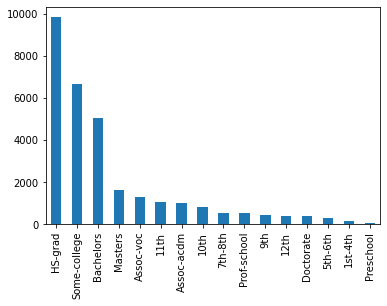

In [69]:
data['education'].value_counts().plot.bar()

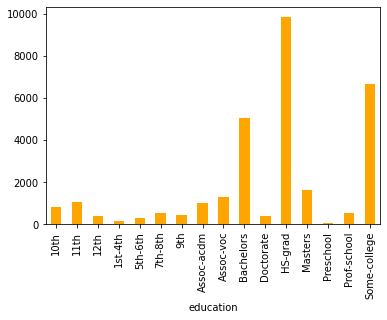

In [60]:
data.groupby('education').agg('count').agg('age').plot(kind='bar',color='orange')

__5. Каковы средние значения и среднеквадратичные отклонения возраста тех, кто получает более 50K в год (признак _salary_) и тех, кто получает менее 50K в год?__  
  
**Tip:** Используйте методы `groupby` и `agg`.

In [75]:
#avg_less,avg_more = tuple(data.groupby('salary').mean()['age'])
data.groupby('salary').age.agg(
    meanAge = 'mean',
    stdAge = 'std'
)

,meanAge,stdAge
salary,,
<=50K,36.60806,13.464631
>50K,43.95911,10.269633


**6. Правда ли, что люди, которые получают больше 50k, имеют как минимум высшее образование? (признак *education - Bachelors, Prof-school, Assoc-acdm, Assoc-voc, Masters* или *Doctorate*)**  
  
**Tip:** Нужно написать код (может хватить и одного выражения), который проверяет выполнение условия и возвращает `True` если условие выполняется (т.е. ответ на вопрос - да, правда) и `False` иначе.

In [90]:
list(set(data.groupby('salary').education.value_counts().loc['>50K'].index.to_list()) - set(['Bachelors','Prof-school','Assoc-acdm','Assoc-voc','Masters','Doctorate']))==[]

False

**7. Выведите статистику возраста для каждой расы (признак *race*) и каждого пола. Используйте *groupby* и *describe*. Найдите таким образом максимальный возраст мужчин расы *Amer-Indian-Eskimo*.**  
  
**Tip:** Максимальный возраст мужчин расы *Amer-Indian-Eskimo* необходимо получить из таблицы, полученной в результате использования методов *groupby* и *describe*. Почитайте про [MultiIndex](https://pandas.pydata.org/pandas-docs/stable/advanced.html).

In [76]:
#data.groupby('race').describe()
#data.groupby('race').max()['age'][0]
data.groupby('sex')['age'].describe()

,count,mean,std,min,25%,50%,75%,max
sex,,,,,,,,
Female,9782.0,36.883459,13.532427,17.0,25.25,35.0,46.0,90.0
Male,20380.0,39.184004,12.873243,17.0,29.00,38.0,48.0,90.0


In [83]:
data.groupby('race')['age'].describe()

,count,mean,std,min,25%,50%,75%,max
race,,,,,,,,
Amer-Indian-Eskimo,286.0,36.737762,11.630168,17.0,28.0,35.0,44.75,80.0
Asian-Pac-Islander,895.0,37.910615,12.587717,17.0,28.0,36.0,46.00,90.0
Black,2817.0,37.860845,12.418791,17.0,28.0,37.0,46.00,90.0
Other,231.0,33.601732,10.949163,17.0,26.0,31.0,41.00,77.0
White,25933.0,38.580612,13.250943,17.0,28.0,37.0,47.00,90.0


In [84]:
data.groupby('race')['age'].describe().loc['Amer-Indian-Eskimo']['max']

80.0

**8. Среди кого больше доля зарабатывающих много (>50K): среди женатых или холостых мужчин (признак *marital-status*)? Женатыми считаем тех, у кого *marital-status* начинается с *Married* (Married-civ-spouse, Married-spouse-absent или Married-AF-spouse), остальных считаем холостыми.**

In [132]:
married_list=['Married-civ-spouse','Married-spouse-absent','Married-AF-spouse']
not_married_list=[]
for el in data['marital-status'].unique():
  if el not in married_list:
    not_married_list.append(el)
print(married_list,not_married_list)

['Married-civ-spouse', 'Married-spouse-absent', 'Married-AF-spouse'] ['Never-married', 'Divorced', 'Separated', 'Widowed']


In [133]:
rich_married = data.groupby(['marital-status', 'sex']).salary.value_counts().loc[married_list, "Male", ">50K"].sum()
all_married = data.groupby(['marital-status', 'sex']).salary.value_counts().loc[married_list, "Male"].sum()
rich_married/all_married 

0.4479843444227006

In [134]:
rich_not_married = data.groupby(['marital-status', 'sex']).salary.value_counts().loc[not_married_list, "Male", ">50K"].sum()
all_not_married = data.groupby(['marital-status', 'sex']).salary.value_counts().loc[not_married_list, "Male"].sum()
rich_not_married/all_not_married 

0.08849441157133466

**9. Какое максимальное число часов человек работает в неделю (признак *hours-per-week*)? Сколько людей работают такое количество часов и каков среди них процент зарабатывающих много?**

In [ ]:
max_hours=data['hours-per-week'].max()
max_hours

99

In [ ]:
hard_reach=data[data['hours-per-week']==max_hours][data['salary']==">50K"].shape[0]
hard=data[data['hours-per-week']==max_hours].shape[0]
hard

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


85

In [ ]:
hard_reach/hard

0.29411764705882354

**10. Посчитайте среднее время работы (*hours-per-week*) зарабатывающих мало и много (*salary*) для каждой страны (*native-country*).**  
  
**Tip:** Необходимо построить `barplot` для каждой страны с разбивкой по признаку *salary*. Используйте [crosstab](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.crosstab.html).  
Пример графика: ![](task_10_example.png)

Text(0.5, 1.0, 'average time of work')

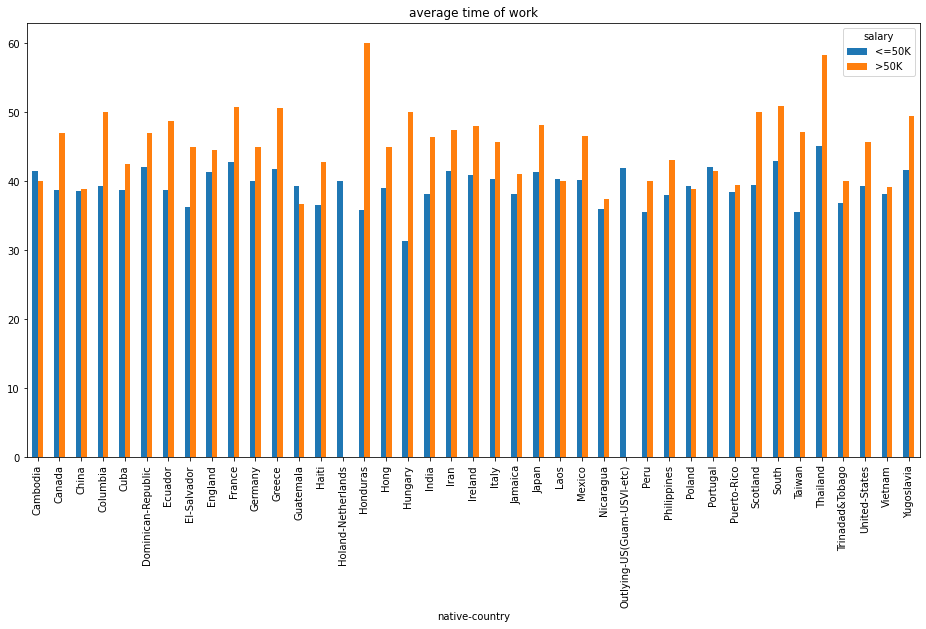

In [125]:
bar_chart = pd.crosstab(data['native-country'], data['salary'], data['hours-per-week'], aggfunc='mean').plot.bar()
plt.rcParams['figure.figsize'] = [20, 10]
bar_chart.set_title("average time of work")

Я считаю, что...
- Пункт 1
- Пункт 2
    - Подпункт 1
    - Подпункт 2
    
[Статья](https://arxiv.org/pdf/2011.08036.pdf)

Текст $E=mc^2$ ещё *текст* $*$

###### Заголовок